In [10]:
import pandas as pd
import numpy as np

In [11]:
df=pd.read_csv("phishing.csv")

In [12]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [13]:
print(df.shape)
unique_df = df.drop_duplicates()
print(unique_df.shape)

for col in df.columns:
    print(f"Column '{col}' contains {df[col].nunique()} unique values:")
    print(df[col].unique())


(11054, 32)
(11054, 32)
Column 'Index' contains 11054 unique values:
[    0     1     2 ... 11051 11052 11053]
Column 'UsingIP' contains 2 unique values:
[ 1 -1]
Column 'LongURL' contains 3 unique values:
[ 1  0 -1]
Column 'ShortURL' contains 2 unique values:
[ 1 -1]
Column 'Symbol@' contains 2 unique values:
[ 1 -1]
Column 'Redirecting//' contains 2 unique values:
[ 1 -1]
Column 'PrefixSuffix-' contains 2 unique values:
[-1  1]
Column 'SubDomains' contains 3 unique values:
[ 0 -1  1]
Column 'HTTPS' contains 3 unique values:
[ 1 -1  0]
Column 'DomainRegLen' contains 2 unique values:
[-1  1]
Column 'Favicon' contains 2 unique values:
[ 1 -1]
Column 'NonStdPort' contains 2 unique values:
[ 1 -1]
Column 'HTTPSDomainURL' contains 2 unique values:
[-1  1]
Column 'RequestURL' contains 2 unique values:
[ 1 -1]
Column 'AnchorURL' contains 3 unique values:
[ 0 -1  1]
Column 'LinksInScriptTags' contains 3 unique values:
[-1  0  1]
Column 'ServerFormHandler' contains 3 unique values:
[-1  1  0]
C

In [14]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [15]:
df.shape #dimensions of data

(11054, 32)

In [16]:
df.isnull().sum() #checking for null values

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score

In [18]:
X= df.drop(columns=['class','Index'])

X.head()  #set of attributes

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1


In [19]:
Y=df['class'] #array
Y=pd.DataFrame(Y)
Y.head() #corrosponding class

,class
0,-1
1,-1
2,-1
3,1
4,1


In [20]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [21]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 30)
(3317, 30)
(7737, 1)
(3317, 1)


**Lets apply Logistic Regression and check its accuracy**

In [22]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline   
#Once this command is executed in any cell, then for the rest of the session,
#the matplotlib plots will appear directly below the cell in which the plot function was called.
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

/home/aditya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
logreg_predict= model_1.predict(test_X)

In [25]:
accuracy_score(logreg_predict,test_Y) #92.76%

0.9243292131444076

In [26]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.89      0.93      0.91      1401
           1       0.95      0.92      0.93      1916

    accuracy                           0.92      3317
   macro avg       0.92      0.93      0.92      3317
weighted avg       0.93      0.92      0.92      3317



In [27]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

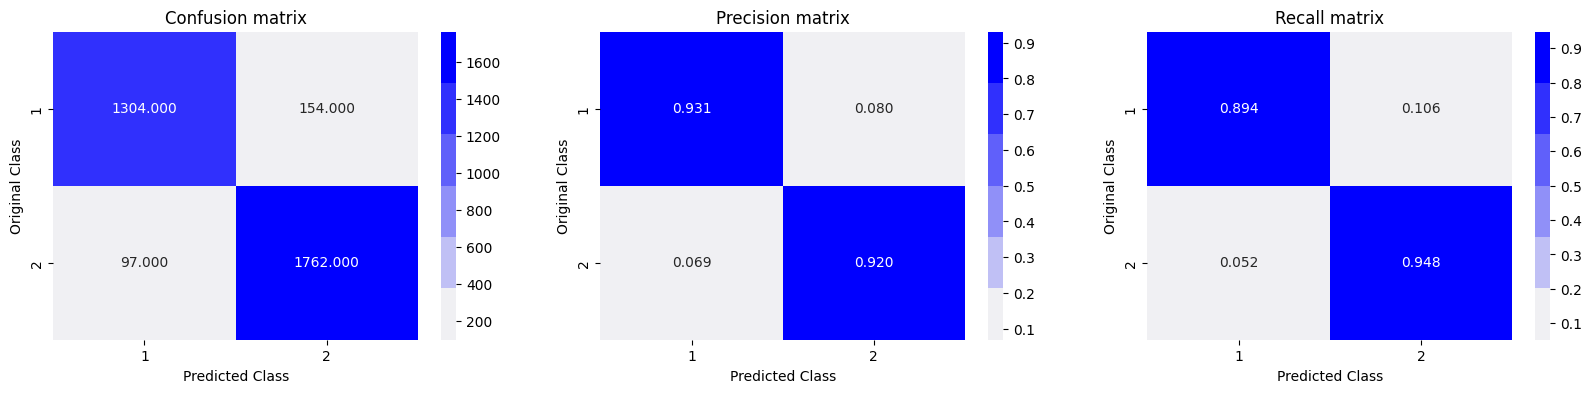

In [28]:
plot_confusion_matrix(test_Y, logreg_predict)

**Lets apply K-Nearest Neighbors Classifier and check its accuracy**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier(n_neighbors=2)
model_2= knn.fit(train_X,train_Y)

/home/aditya/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [31]:
knn_predict=model_2.predict(test_X)

In [32]:
accuracy_score(knn_predict,test_Y)

0.9381971661139584

In [33]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.90      0.97      0.93      1458
           1       0.97      0.91      0.94      1859

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



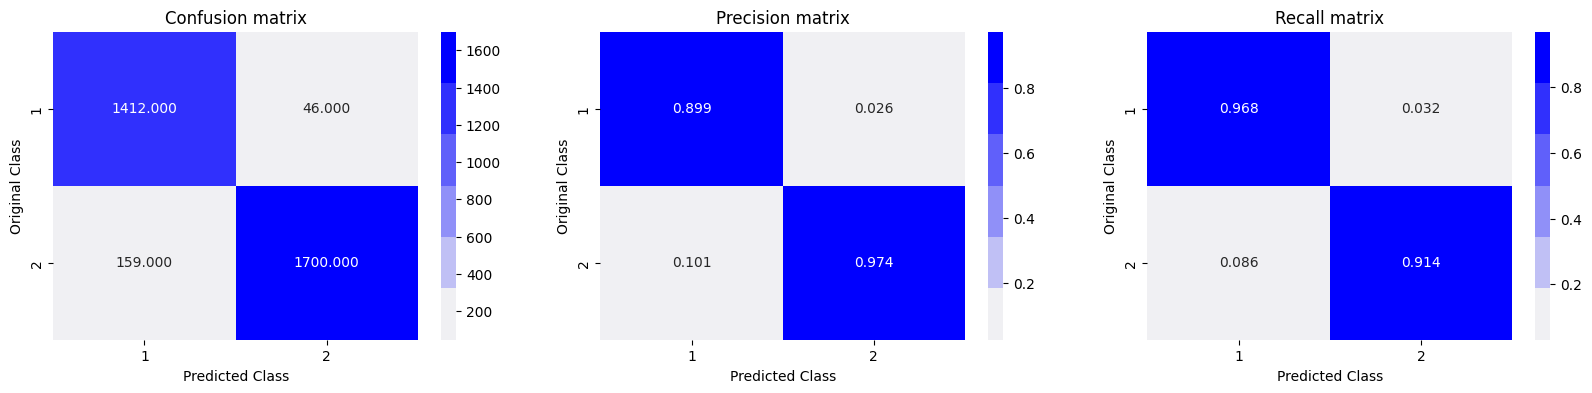

In [34]:
plot_confusion_matrix(test_Y, knn_predict)

**Lets apply Decision Tree Classifier and check its classifier**

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [37]:
dtree_predict=model_3.predict(test_X)

In [38]:
accuracy_score(dtree_predict,test_Y)

0.963521254145312

In [39]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1455
           1       0.97      0.97      0.97      1862

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



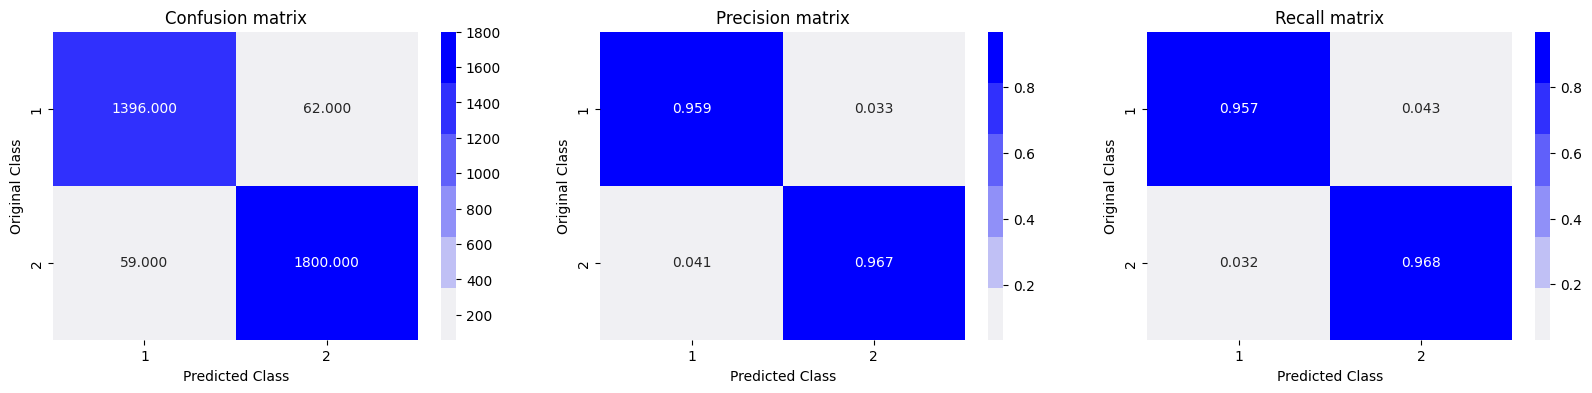

In [40]:
plot_confusion_matrix(test_Y, dtree_predict)

**Lets apply Random Forest Classifier and check its accuracy**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

/tmp/ipykernel_61672/1551461989.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4=rfc.fit(train_X,train_Y)


In [43]:
rfc_predict=model_4.predict(test_X)

In [44]:
accuracy_score(rfc_predict,test_Y)

0.9746759119686463

In [45]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1430
           1       0.98      0.97      0.98      1887

    accuracy                           0.97      3317
   macro avg       0.97      0.98      0.97      3317
weighted avg       0.97      0.97      0.97      3317



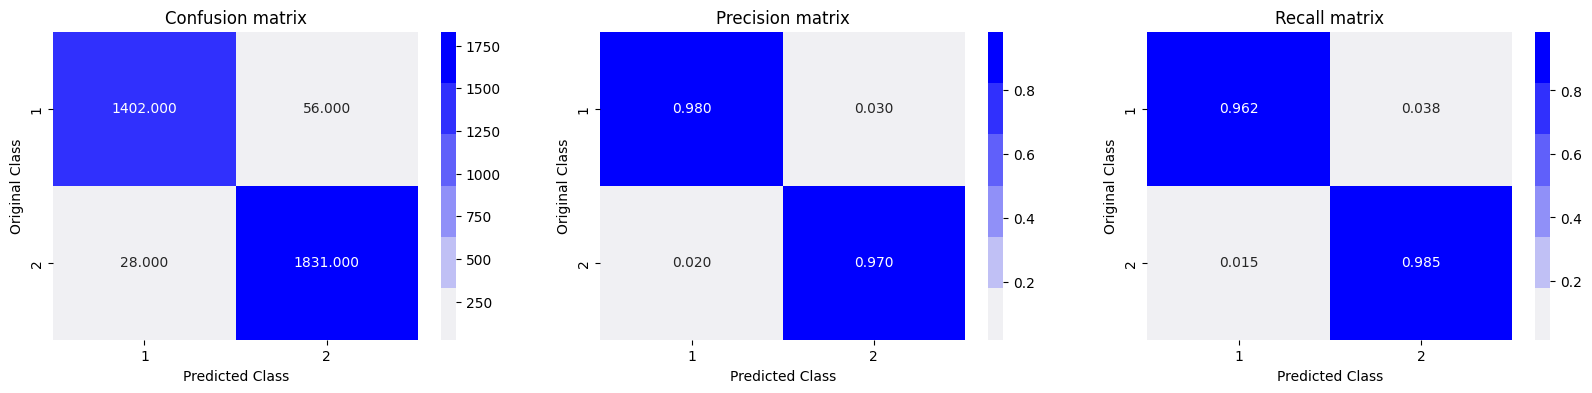

In [46]:
plot_confusion_matrix(test_Y, rfc_predict)

**Lets Apply SVM and check its accuracy**

In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

/home/aditya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
svm_predict=model_5.predict(test_X)

In [50]:
accuracy_score(svm_predict,test_Y)

0.9472414832680133

In [51]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.92      0.96      0.94      1397
           1       0.97      0.94      0.95      1920

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



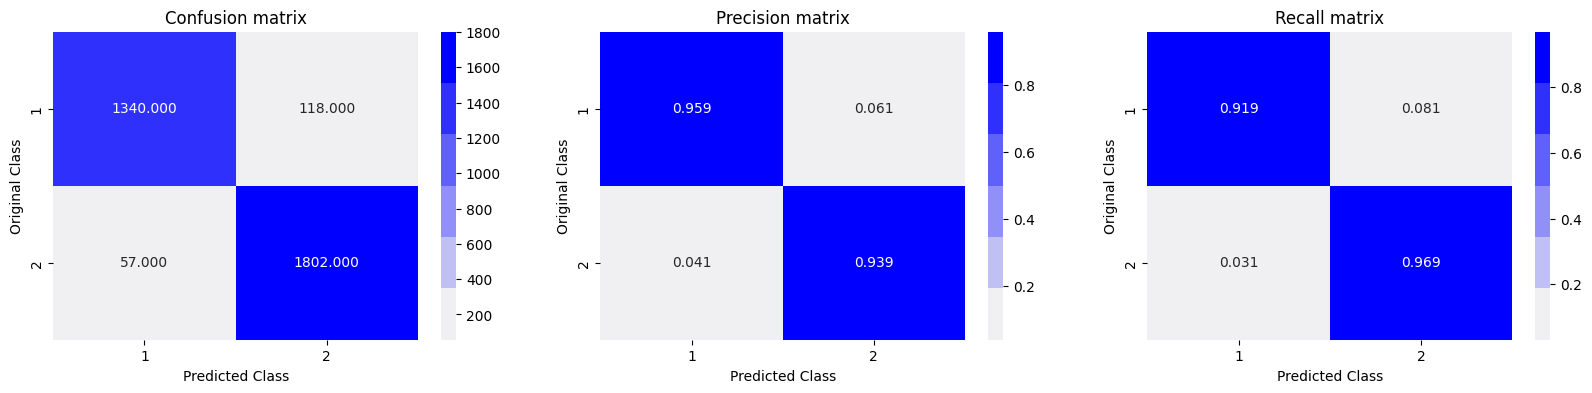

In [52]:
plot_confusion_matrix(test_Y, svm_predict)

**Lets apply AdaBoost Classifier and check its accuracy**

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

/home/aditya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
adc_predict=model_6.predict(test_X)

In [56]:
accuracy_score(adc_predict,test_Y)

0.9104612601748568

In [57]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



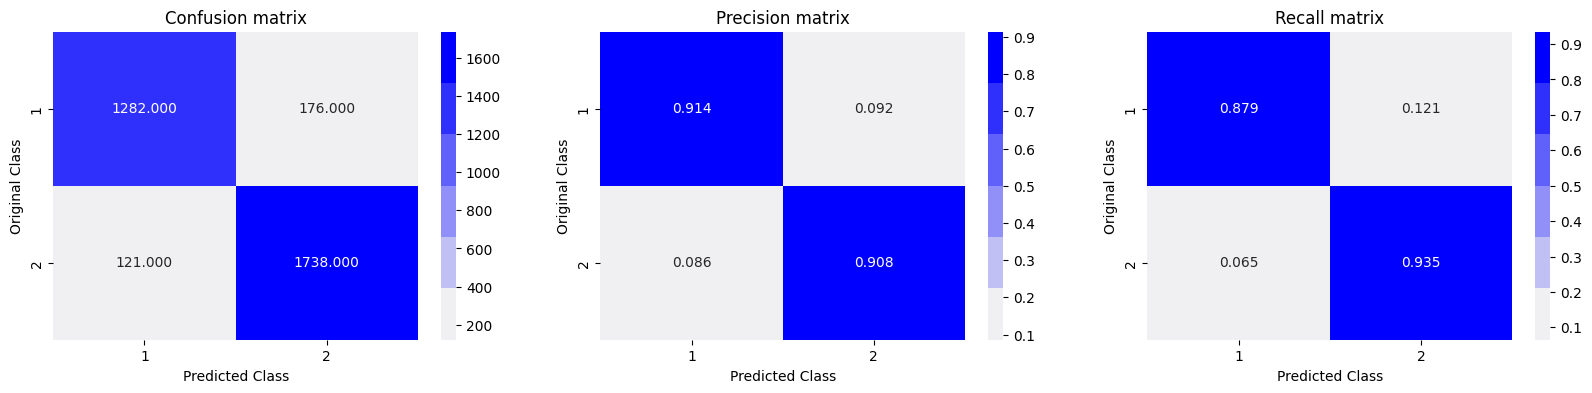

In [58]:
plot_confusion_matrix(test_Y, adc_predict)

Lets apply XGBoost Classifier and check its accuracy

In [59]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('Support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))


Logistic Regression Accuracy: 0.9243292131444076
K-Nearest Neighbour Accuracy: 0.9381971661139584
Decision Tree Classifier Accuracy: 0.963521254145312
Random Forest Classifier Accuracy: 0.9746759119686463
Support Vector Machine Accuracy: 0.9472414832680133
Adaboost Classifier Accuracy: 0.9104612601748568


From all the models we developed , Random forest accuracy has highest accuracy and followed by decision tree and SVM. Lowest accuracy model is Adaboost. 

Now lets consider only two imporatant features Prefix_Suffix and URL_of_Anchor.

In [60]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [61]:
X=df[['LongURL', 'ShortURL','PrefixSuffix-','HTTPS','UsingIP','Symbol@']]
X.head()

,LongURL,ShortURL,PrefixSuffix-,HTTPS,UsingIP,Symbol@
0,1,1,-1,1,1,1
1,0,1,-1,-1,1,1
2,0,1,-1,-1,1,1
3,0,-1,-1,1,1,1
4,0,-1,-1,1,-1,1


In [62]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [63]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 6)
(3317, 6)
(7737, 1)
(3317, 1)


Now lets apply logistic Regression for this new model which is having only two features

In [64]:
model_7=logreg.fit(train_X,train_Y)

/home/aditya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
logreg_predict=model_7.predict(test_X)

In [66]:
accuracy_score(test_Y,logreg_predict)

0.9011154657823335

In [67]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.88      1368
           1       0.94      0.89      0.91      1949

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



Now lets apply KNN for this new model which is having only two features

In [68]:
model_8=knn.fit(train_X,train_Y)

/home/aditya/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [69]:
knn_predict=model_8.predict(test_X)

In [70]:
accuracy_score(test_Y,knn_predict)

0.8926741031052156

In [71]:
print(classification_report(knn_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.87      0.88      0.88      1432
           1       0.91      0.90      0.90      1885

    accuracy                           0.89      3317
   macro avg       0.89      0.89      0.89      3317
weighted avg       0.89      0.89      0.89      3317



Now lets apply Decision Tree Classifier for this new model which is having only two features

In [72]:
model_9=dtree.fit(train_X,train_Y)

In [73]:
dtree_predict=model_9.predict(test_X)

In [74]:
accuracy_score(test_Y,dtree_predict)

0.9014169430208019

In [75]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.88      1369
           1       0.94      0.89      0.91      1948

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



Now lets apply Random Forest Classifier for this new model which is having only two features

In [76]:
model_10=rfc.fit(train_X,train_Y)

/tmp/ipykernel_61672/1275659928.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_10=rfc.fit(train_X,train_Y)


In [77]:
rfc_predict=model_10.predict(test_X)

In [78]:
accuracy_score(test_Y,rfc_predict)

0.9014169430208019

In [79]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.88      1369
           1       0.94      0.89      0.91      1948

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



Lets Apply SVM and check its accuracy

In [80]:
model_11=svc.fit(train_X,train_Y)

/home/aditya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
svc_predict=model_11.predict(test_X)

In [82]:
accuracy_score(test_Y,svc_predict)

0.9011154657823335

In [83]:
print(classification_report(svc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.88      1368
           1       0.94      0.89      0.91      1949

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



Lets apply AdaBoost Classifier and check its accuracy

In [84]:
model_12=adc.fit(train_X,train_Y)

/home/aditya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
adc_predict=model_12.predict(test_X)

In [86]:
accuracy_score(test_Y,adc_predict)

0.9011154657823335

In [87]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.88      1368
           1       0.94      0.89      0.91      1949

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



In [88]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))


Logistic Regression Accuracy: 0.9011154657823335
K-Nearest Neighbour Accuracy: 0.8926741031052156
Decision Tree Classifier Accuracy: 0.9014169430208019
Random Forest Classifier Accuracy: 0.9014169430208019
support Vector Machine Accuracy: 0.9472414832680133
Adaboost Classifier Accuracy: 0.9011154657823335


In [89]:
features = np.array([[-1,1,1,-1,-1,-1]])

In [90]:
prediction = model_11.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [-1]


/home/aditya/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [91]:
import pickle
pickle.dump(model_11, open('models/final_prediction.pickle', 'wb'))